In [153]:
import os
import glob as g
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

#### Sample image

In [154]:
# Sample image
direcroty = './image'
img_j = Image.open(direcroty +'/' + 'j' + str(1) + '.jpg')
img_s = Image.open(direcroty +'/' + 's' + str(1) + '.jpg')

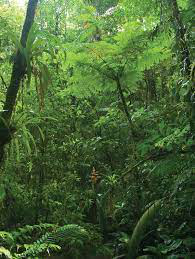

In [155]:
img_j

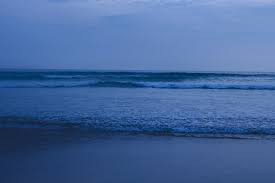

In [156]:
img_s

## 2 Class Classifier

In [157]:
jungle = np.array([0, 255, 0])
sea = np.array([0, 0, 255])

In [158]:
wrong_data = []
label = []
predict0 = []
predict1 = []
            
for img_path in g.glob(direcroty+'/*.jpg'):
    img_type = img_path.split('\\')[-1][0]
    img = Image.open(img_path)
    img_arr = np.array(img)
    avg = np.mean(img_arr, axis=(0, 1))

    if np.linalg.norm(avg - sea) <= np.linalg.norm(avg - jungle):
        if img_type == 's': # label 0
            predict0.append(0)
        else:
            predict0.append(0)
            wrong_data.append(img_arr)
            label.append(('Jungle', 'Sea'))
    else:
        if img_type == 'j': # label 0
            predict1.append(1)
        else:
            predict1.append(0)
            wrong_data.append(img_arr)
            label.append(('Sea', 'Jungle'))
            
predict0, predict1 = np.array(predict0), np.array(predict1)

TP = np.sum(predict1) # true positive
FP = np.sum(predict0) # flase positive
TN = np.sum(1 - predict0) # true negetive
FN = np.sum(1 - predict1) # false negetive



confusion_mat = np.array([[TP, FP], [FN, TN]])

## Results

In [159]:
accuracy = (TP + TN) / (TP + FP + TN + FN) * 100
precision = TP / (TP + FP) * 100
recall = TP / (TP + FN) * 100

print("confusion matrix is:")
print(confusion_mat)
print('--------------------------')
print("accuracy is: " + str(accuracy)+ "%")
print("precision is: " + str(precision))
print("recall is: " + str(recall))

confusion matrix is:
[[40  0]
 [ 1 41]]
--------------------------
accuracy is: 98.78048780487805%
precision is: 100.0
recall is: 97.5609756097561


### Wrong Images

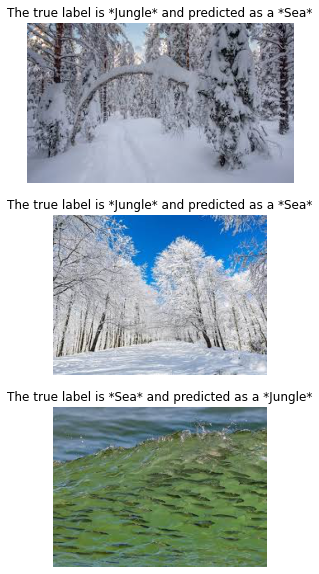

In [160]:
fig = plt.figure(figsize=(5, 10))
for i, img in enumerate(wrong_data):
    ax = plt.subplot(len(wrong_data), 1, i+1)
    ax.imshow(img)
    ax.axis('off')
    lab = label[i]
    ax.set_title(f'The true label is *{lab[0]}* and predicted as a *{lab[1]}*')